In [1]:
using MosekTools
using JuMP
solver = optimizer_with_attributes(Mosek.Optimizer, MOI.Silent() => true)

OptimizerFactory(Mosek.Optimizer, (), Base.Iterators.Pairs(:QUIET => 1))

In [2]:
using HybridSystems
include(joinpath(dirname(dirname(pathof(HybridSystems))), "examples", "horizontal_jump.jl"))
system = horizontal_jump_example(default_library(2, Float64), true)
alg = algebraiclift(system)

UndefVarError: UndefVarError: algebraiclift not defined

In [12]:
rm1 = algebraiclift(system.resetmaps[1])

ConstrainedLinearAlgebraicDiscreteSystem{Float64,Array{Float64,2},Array{Float64,2},DefaultPolyhedron{Float64,MixedMatHRep{Float64,Array{Float64,2}},MixedMatVRep{Float64,Array{Float64,2}}}}([1.0 0.0 1.0; 0.0 1.0 0.0], [1.0 0.0 0.0; 0.0 1.0 0.0], HalfSpace([1.0, 0.0, 0.0], 1.0) ∩ HalfSpace([0.0, 1.0, 0.0], 1.0) ∩ HalfSpace([-1.0, -0.0, 0.0], 1.0) ∩ HalfSpace([-0.0, -1.0, 0.0], 1.0) ∩ HalfSpace([0.0, 0.0, 1.0], 2.0) ∩ HalfSpace([0.0, 0.0, -1.0], -2.0))

In [13]:
rm2 = algebraiclift(system.resetmaps[2])

ConstrainedLinearAlgebraicDiscreteSystem{Float64,Array{Float64,2},Array{Float64,2},DefaultPolyhedron{Float64,MixedMatHRep{Float64,Array{Float64,2}},MixedMatVRep{Float64,Array{Float64,2}}}}([1.0 0.0 1.0; 0.0 1.0 0.0], [1.0 0.0 0.0; 0.0 1.0 0.0], HalfSpace([1.0, 0.0, 0.0], 4.0) ∩ HalfSpace([0.0, 1.0, 0.0], 2.0) ∩ HalfSpace([-1.0, -0.0, 0.0], -2.0) ∩ HalfSpace([-0.0, -1.0, 0.0], 1.0) ∩ HalfSpace([0.0, 0.0, 1.0], 2.0) ∩ HalfSpace([0.0, 0.0, -1.0], -2.0))

In [3]:
using SetProg
set1 = polyhedron(convexhull([-1.0], [1.0]))
var1 = SetProg.Ellipsoid(point = InteriorPoint([0.0]))
set2 = polyhedron(convexhull([0.0], [2.0]))
var2 = SetProg.Ellipsoid(point = InteriorPoint([1.0]))

Ellipsoid(InteriorPoint{Float64}([1.0]), false, 1, false, nothing)

In [4]:
set2

Polyhedron Interval{Float64,StaticArrays.SArray{Tuple{1},Float64,1,1},StaticArrays.Size{(1,)}}:
2-element iterator of HalfSpace{Float64,StaticArrays.SArray{Tuple{1},Float64,1,1}}:
 HalfSpace([1.0], 2.0)
 HalfSpace([-1.0], -0.0):
2-element iterator of StaticArrays.SArray{Tuple{1},Float64,1,1}:
 [2.0]
 [0.0]

In [22]:
using SetProg
model = Model(solver)
@variable(model, ell1, var1)
@variable(model, ell2, var2)
@constraint(model, ell1 ⊆ set1)
@constraint(model, ell2 ⊆ set2)
using LinearAlgebra
Id = Matrix(1.0I, 1, 1)
@constraint(model, Id * ell1 + [ 1.0] ⊆ Id * ell2, S_procedure_scaling = 0.5)
@constraint(model, Id * ell2 + [-1.0] ⊆ Id * ell1, S_procedure_scaling = 2.0)
@objective(model, Max, L1_heuristic(volume(ell1), [1.0]))
optimize!(model)
termination_status(model)

Sets.perspective_gauge0(li.set.set) = (β)z² + (-2 b[1])zx₁ + (Q[1,1])x₁²
q = (β)z² + (-2 b[1])zx₁ + (Q[1,1])x₁²
p = (β)z² + (2 β - 2 b[1])zx₁ + (β - 2 b[1] + Q[1,1])x₁²
Sets.perspective_gauge0(li.set.set) = (0.4999999999999996 β + b[1] + 0.4999999999999999 Q[1,1])z² + (β + 2.220446049250313e-16 b[1] - Q[1,1])zx₁ + (0.4999999999999999 β - b[1] + 0.4999999999999999 Q[1,1])x₁²
q = (0.4999999999999996 β + b[1] + 0.4999999999999999 Q[1,1])z² + (β + 2.220446049250313e-16 b[1] - Q[1,1])zx₁ + (0.4999999999999999 β - b[1] + 0.4999999999999999 Q[1,1])x₁²
p = (0.4999999999999996 β + b[1] + 0.4999999999999999 Q[1,1])z² + (3.3306690738754696e-16 β - 1.999999999999999 b[1] - 1.9999999999999996 Q[1,1])zx₁ + (-5.551115123125783e-17 β - 4.440892098500626e-16 b[1] + 1.9999999999999996 Q[1,1])x₁²


OPTIMAL::TerminationStatusCode = 1

In [65]:
model

A JuMP Model
Maximization problem with:
Variables: 6
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.LessThan{Float64}`: 4 constraints
`Array{VariableRef,1}`-in-`MathOptInterface.Nonnegatives`: 2 constraints
`Array{GenericAffExpr{Float64,VariableRef},1}`-in-`SumOfSquares.PositiveSemidefinite2x2ConeTriangle`: 2 constraints
`Array{GenericAffExpr{Float64,VariableRef},1}`-in-`SumOfSquares.SOSPolynomialSet{SemialgebraicSets.FullSpace,DynamicPolynomials.Monomial{true},DynamicPolynomials.MonomialVector{true},SumOfSquares.Certificate.Remainder{SumOfSquares.NonnegPolyInnerCone{MathOptInterface.PositiveSemidefiniteConeTriangle},PolyJuMP.MonomialBasis,Tuple{}}}`: 1 constraint
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Mosek
Names registered in the model: ell1, ell2

In [10]:
model

A JuMP Model
Maximization problem with:
Variables: 6
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.LessThan{Float64}`: 4 constraints
`Array{VariableRef,1}`-in-`MathOptInterface.Nonnegatives`: 2 constraints
`Array{GenericAffExpr{Float64,VariableRef},1}`-in-`SumOfSquares.PositiveSemidefinite2x2ConeTriangle`: 2 constraints
`Array{GenericAffExpr{Float64,VariableRef},1}`-in-`SumOfSquares.SOSPolynomialSet{SemialgebraicSets.FullSpace,DynamicPolynomials.Monomial{true},DynamicPolynomials.MonomialVector{true},SumOfSquares.Certificate.Remainder{SumOfSquares.NonnegPolyInnerCone{MathOptInterface.PositiveSemidefiniteConeTriangle},PolyJuMP.MonomialBasis,Tuple{}}}`: 1 constraint
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Mosek
Names registered in the model: ell1, ell2

In [53]:
model

A JuMP Model
Maximization problem with:
Variables: 6
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.LessThan{Float64}`: 4 constraints
`Array{VariableRef,1}`-in-`MathOptInterface.Nonnegatives`: 2 constraints
`Array{GenericAffExpr{Float64,VariableRef},1}`-in-`SumOfSquares.PositiveSemidefinite2x2ConeTriangle`: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Mosek
Names registered in the model: ell1, ell2

In [20]:
SetProg.Sets.ellipsoid(value(ell1))

SetProg.Sets.Translation{SetProg.Sets.EllipsoidAtOrigin{Float64},Float64,Array{Float64,1}}(SetProg.Sets.EllipsoidAtOrigin{Float64}([1.0000000012739738]), [2.1336303575307763e-9])

In [21]:
SetProg.Sets.ellipsoid(value(ell2))

SetProg.Sets.Translation{SetProg.Sets.EllipsoidAtOrigin{Float64},Float64,Array{Float64,1}}(SetProg.Sets.EllipsoidAtOrigin{Float64}([0.9999999983865282]), [1.0000000038811265])

In [71]:
value(ell1).set.set.b

1-element Array{Float64,1}:
 -0.2499999994475424

In [74]:
value(ell1)

SetProg.Sets.PerspectiveDual{Float64,SetProg.Sets.Householder{Float64,SetProg.Sets.ShiftedEllipsoid{Float64},Float64}}(SetProg.Sets.Householder{Float64,SetProg.Sets.ShiftedEllipsoid{Float64},Float64}(SetProg.Sets.ShiftedEllipsoid{Float64}([1.0000000001143214], [1.1085528099569366e-16], -0.9999999999990953), -0.9999999999990953z² - 2.217105619913873e-16zx₁ + 1.0000000001143214x₁², [0.0], z, DynamicPolynomials.PolyVar{true}[x₁]))

In [29]:
value(ell2)

SetProg.Sets.PerspectiveDual{Float64,SetProg.Sets.Householder{Float64,SetProg.Sets.ShiftedEllipsoid{Float64},Float64}}(SetProg.Sets.Householder{Float64,SetProg.Sets.ShiftedEllipsoid{Float64},Float64}(SetProg.Sets.ShiftedEllipsoid{Float64}([0.09080350261374853], [-0.09845152272267267], -0.7853174958852094), -0.4457085193584028z² - 0.8761209984989575zx₁ - 0.24880547391305766x₁², [1.0], z, DynamicPolynomials.PolyVar{true}[x₁]))

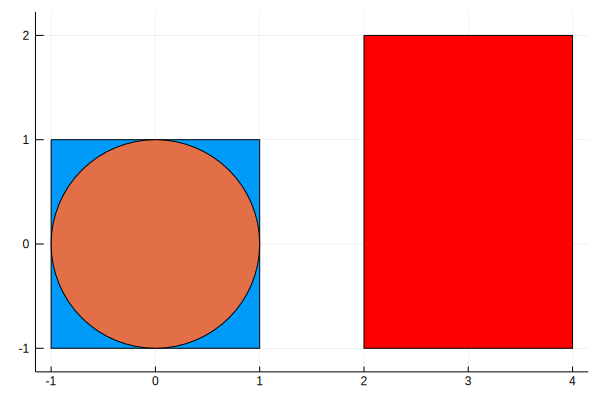

In [15]:
using Plots
plot(stateset(system, 1), ratio=1)
plot!(project(value(ell1), 1:2))
plot!(stateset(system, 2), color=:red)